In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#loading the data
fake=pd.read_csv(r"C:\Users\USER\Downloads\Fake.csv\Fake.csv")
true=pd.read_csv(r"C:\Users\USER\Downloads\True.csv\True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#Creating a category for whether fake or not
#where 1 stand for fake news and 0 stands for true news

fake["category"]=1
true["category"]=0

In [6]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)

In [7]:
df.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [14]:
df.describe()

,category
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\USER\AppData\Local\Temp\ipykernel_18524\1718719438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x="category", data=df, palette="rainbow")


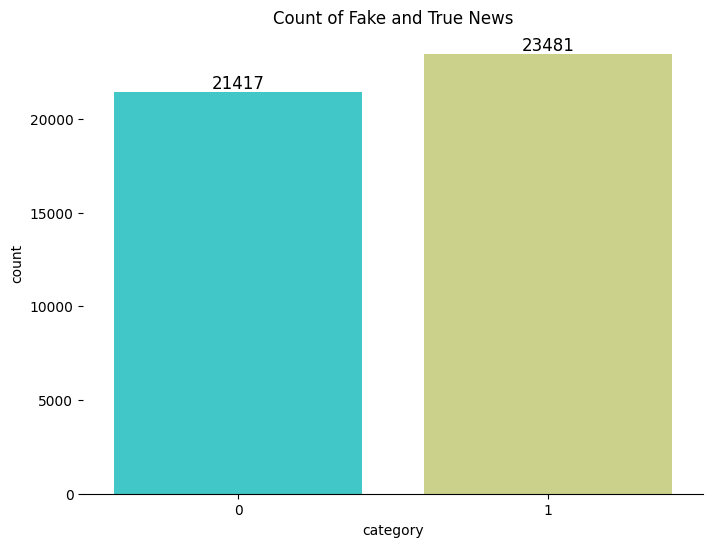

In [11]:
# Plot the bar chart
plt.figure(figsize=(8, 6))

graph = sns.countplot(x="category", data=df, palette="rainbow")
plt.title("Count of Fake and True News")

# Styling: Remove chart spines
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

# Annotate bars with the count values
for p in graph.patches:
    count = int(p.get_height())
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_height() + 200
    graph.text(x_position, y_position, f'{count}', ha='center', fontsize=12)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17764\3230654834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x="subject", data=df,palette="rainbow")


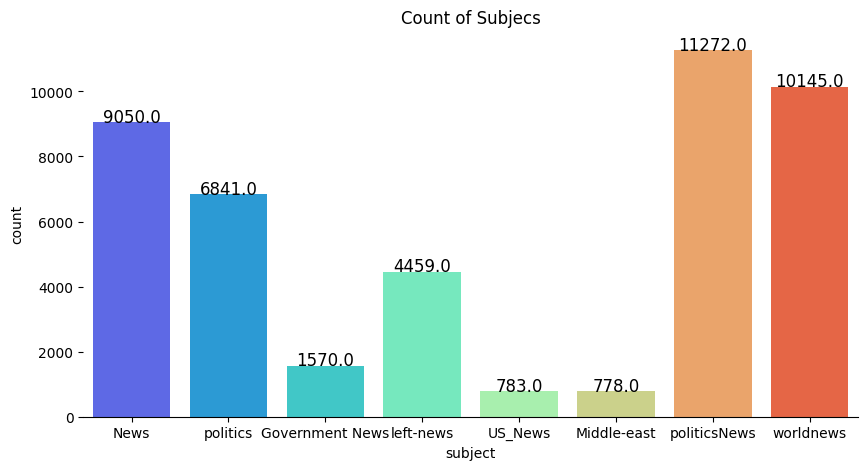

In [17]:
#creating a count plot for subject column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="subject", data=df,palette="rainbow")
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)
plt.show()

# Data Cleaning

In [12]:
#checking the missing values in each columns
df.isna().sum()*100/len(df)

title       0.0
text        0.0
subject     0.0
date        0.0
category    0.0
dtype: float64

In [13]:
df.columns

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

In [14]:
blanks = []

# Make sure the column name matches exactly, case-sensitive!
for index, text in df["text"].items():
    if isinstance(text, str) and (text.isspace() or text == ""):
        blanks.append(index)

print(f"Total empty strings in 'text' column: {len(blanks)}")
#isinstance(text, str) checks if the value is a string. This prevents errors 
#if the column has NaN or numbers.

Total empty strings in 'text' column: 631


In [15]:
#instead of dropping these values we are going to merge title with text

df["text"] =df["title"]+df["text"]

#we only need two columns rest can be ignored

df=df[["text","category"]]

In [16]:
#importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re


Stopwords
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change your home directory name)

Lemmatisation
lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.


In [17]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [18]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
198
401


In [21]:

#text cleaning function
def clean_text(text):
    
    """
    It takes text as an input and clean it by applying several methods
    
    """
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [22]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)

In [33]:
df.head()

,text,category
0,donald trump sends embarrassing new year eve m...,1
1,drunk bragging trump staffer started russian c...,1
2,sheriff david clarke internet joke threatening...,1
3,trump obsessed obama coded website image chris...,1
4,pope francis called donald trump christmas spe...,1


# Word Cloud

In [23]:
from wordcloud import WordCloud

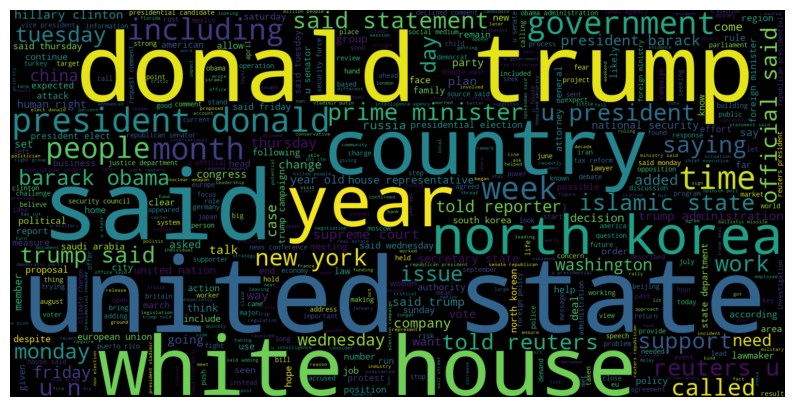

In [25]:
#True News
plt.figure(figsize = (10,8))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

plt.savefig("f1.png", bbox_inches='tight')  # Saves as PNG
plt.show()

In [26]:
#creating more intiuive wordcloud 

#pil is pillow and used for image manupulation
from PIL import Image

In [36]:
#creating a mask of thumb
thumb = "f3.png"
icon=Image.open(thumb).convert("L")

mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)
plt.savefig("f3.png", bbox_inches='tight')
rgb_array=np.array(mask)

In [48]:

#creating word cloud using skull image for fake news which depict that 
#fake news are dangerous 

skull="f4.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

<Figure size 1000x800 with 0 Axes>

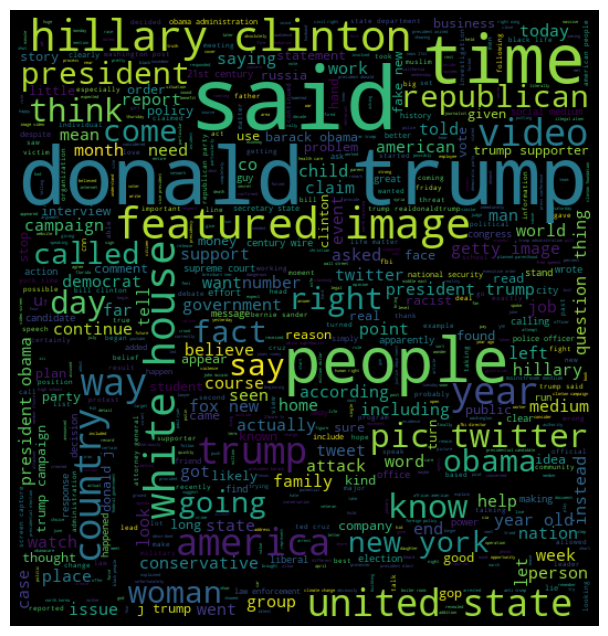

In [32]:
#Fake News
plt.figure(figsize = (10,8))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

plt.show()

# Feature-Extraction & Model building

In [40]:
#splitting the 
from sklearn.model_selection import train_test_split


X=df["text"] #feature 
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:

#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [42]:

#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [43]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [44]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7039
           1       0.99      0.99      0.99      7778

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [45]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9935884457042586


In [46]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[6997   42]
 [  53 7725]]


# Plot the confusion matrix

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

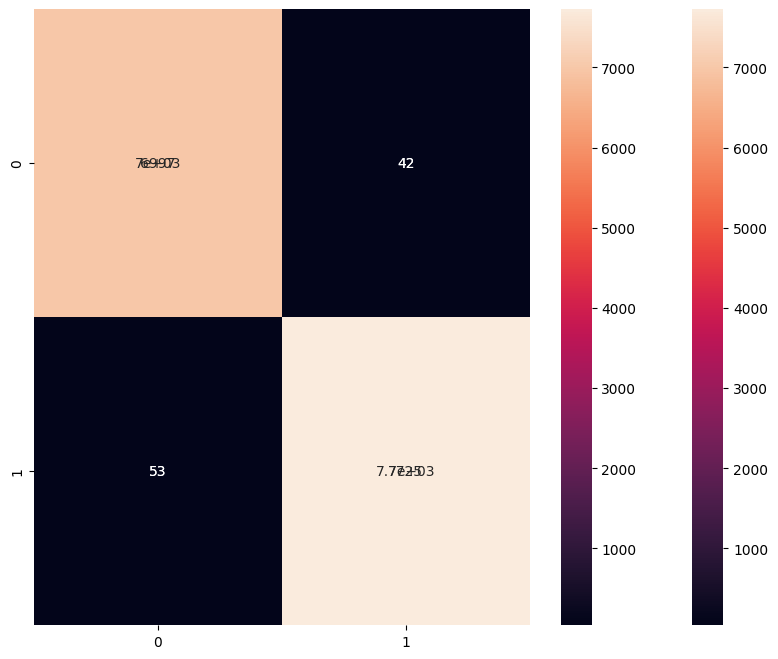

In [48]:
sns.heatmap(metrics.confusion_matrix(y_test,predictions),annot=True,fmt = 'd')
plt.show()

# Create a classification report

In [49]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7039
           1       0.99      0.99      0.99      7778

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817

